In [2]:
from google.colab import files
uploaded = files.upload()


Saving students.csv to students.csv


             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

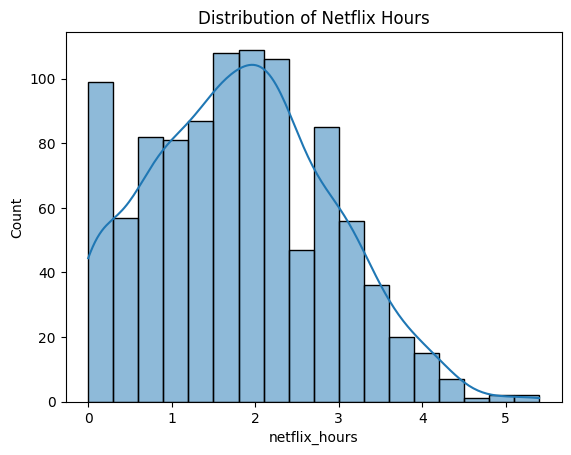

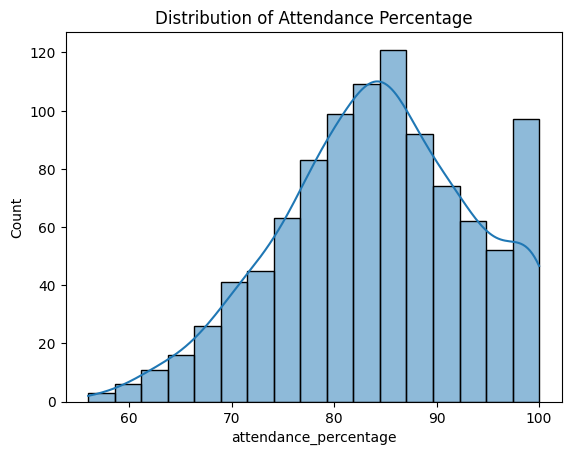

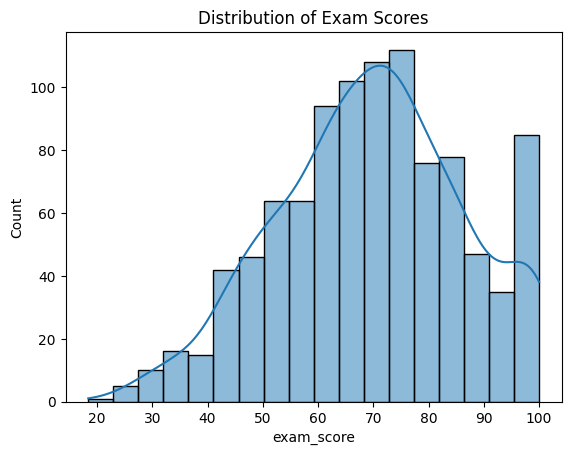

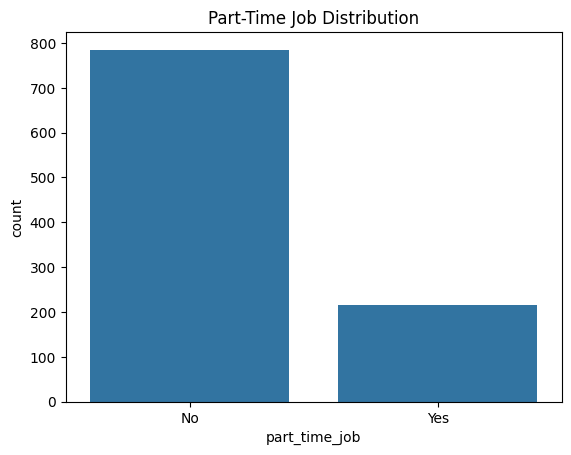

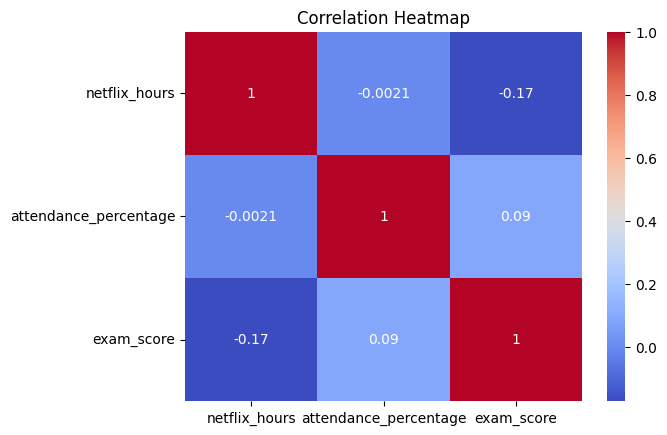

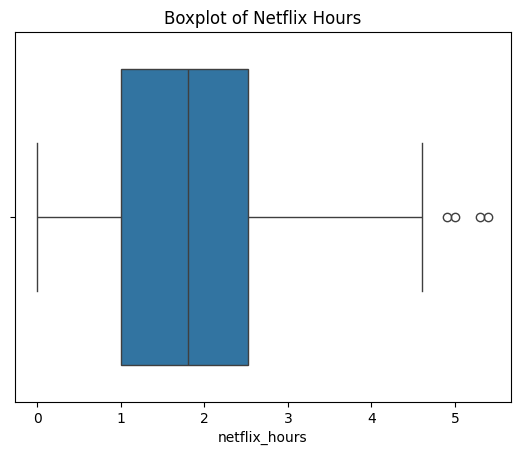

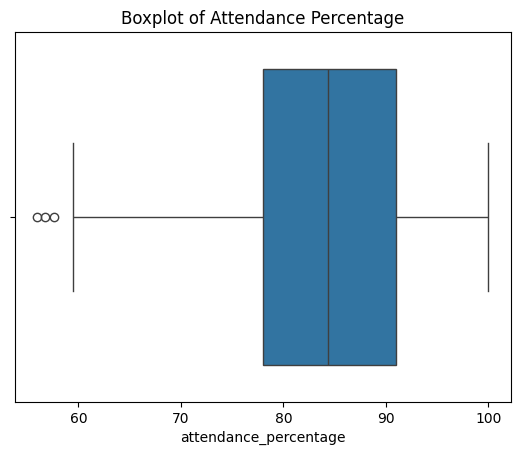


Netflix Hours Outliers:
     student_id  netflix_hours
81       S1081            5.0
556      S1556            5.4
822      S1822            5.3
887      S1887            4.9

Attendance Percentage Outliers:
     student_id  attendance_percentage
651      S1651                   57.6
706      S1706                   56.7
971      S1971                   56.0

Bias Squared: 284.93836775
Variance: 285.223591341341


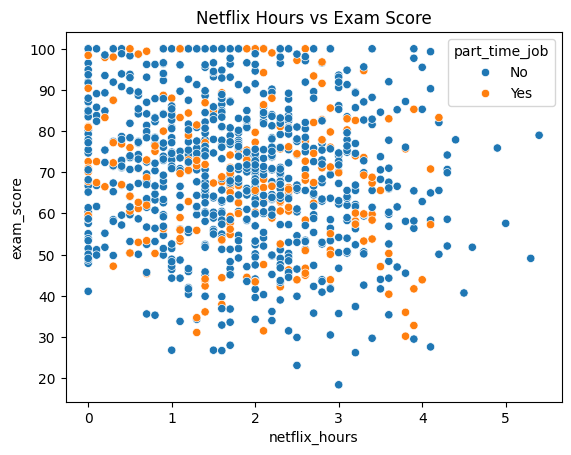

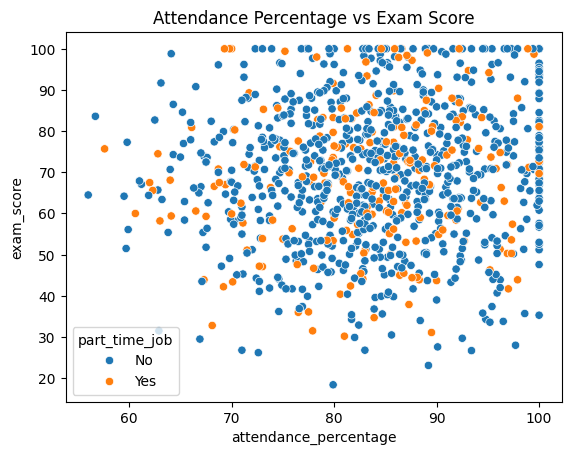

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('students.csv')

df.head()

print(df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Calculate correlation (r-values) between exam_score and selected features
selected_features = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

print("\nCorrelation (r-values) with exam_score:")
for feature in selected_features:
    r_value = df[feature].corr(df['exam_score'])
    # Interpret strength
    abs_r = abs(r_value)
    if abs_r >= 0.7:
        strength = "strong"
    elif abs_r >= 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    print(f"{feature}: r = {r_value:.3f} ({strength} correlation)")

# plotting
sns.histplot(df['netflix_hours'], kde=True)
plt.title('Distribution of Netflix Hours')
plt.show()

sns.histplot(df['attendance_percentage'], kde=True)
plt.title('Distribution of Attendance Percentage')
plt.show()

sns.histplot(df['exam_score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

sns.countplot(x='part_time_job', data=df)
plt.title('Part-Time Job Distribution')
plt.show()

# heatmap correlation
correlation_matrix = df[['netflix_hours', 'attendance_percentage', 'exam_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# boxplots for outlier detection
sns.boxplot(x=df['netflix_hours'])
plt.title('Boxplot of Netflix Hours')
plt.show()

sns.boxplot(x=df['attendance_percentage'])
plt.title('Boxplot of Attendance Percentage')
plt.show()

# find outliers w/ student id
def find_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers[['student_id', feature]]

netflix_outliers = find_outliers('netflix_hours')
attendance_outliers = find_outliers('attendance_percentage')

print("\nNetflix Hours Outliers:\n", netflix_outliers)
print("\nAttendance Percentage Outliers:\n", attendance_outliers)

# bias and variance
bias = df['exam_score'].mean() - df['exam_score']
bias_squared = (bias**2).mean()
variance = df['exam_score'].var()

print('\nBias Squared:', bias_squared)
print('Variance:', variance)

# scatter plots
sns.scatterplot(x='netflix_hours', y='exam_score', hue='part_time_job', data=df)
plt.title('Netflix Hours vs Exam Score')
plt.show()

sns.scatterplot(x='attendance_percentage', y='exam_score', hue='part_time_job', data=df)
plt.title('Attendance Percentage vs Exam Score')
plt.show()
